In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from prophet import Prophet
from prophet.diagnostics import cross_validation, performance_metrics
from prophet.plot import plot_cross_validation_metric

In [2]:
dt1 = pd.read_csv("dc.csv")
dt1

,Unnamed: 0,open_SAR,open_USD,high_SAR,high_USD,low_SAR,low_USD,close_SAR,close_USD,volume
0,2021-01-30,128437.248512,34246.28,131012.723200,34933.00,123106.880000,32825.00,128333.212416,34218.54,43072
1,2021-01-29,125144.022272,33368.18,144510.037760,38531.90,119695.516160,31915.40,128459.450880,34252.20,231827
2,2021-01-28,113870.357376,30362.19,126703.438592,33783.98,111919.811840,29842.10,125131.570944,33364.86,92621
3,2021-01-27,121753.023104,32464.01,122102.860416,32557.29,109668.146688,29241.72,113885.208960,30366.15,95911
4,2021-01-26,120966.114176,32254.19,123470.218752,32921.88,115652.472448,30837.37,121767.124608,32467.77,84972
...,...,...,...,...,...,...,...,...,...,...
995,2018-05-11,33761.888384,9002.21,33816.606720,9016.80,31282.086400,8341.00,31503.360000,8400.00,48227
996,2018-05-10,34916.224000,9310.00,35235.458048,9395.12,33641.088000,8970.00,33761.850880,9002.20,25055
997,2018-05-09,34421.171200,9178.00,35216.256000,9390.00,33622.336000,8965.00,34916.224000,9310.00,25673
998,2018-05-08,35122.496000,9365.00,35537.665280,9475.70,33980.649216,9060.54,34457.025024,9187.56,25533


Data Card -

Index Type: datetime

open_SAR
Opening price Saudi Riyal(SAR)

open_USD
Opening price (USD)

high_SAR
Highest stock price (SAR)

high_USD
Highest stock price (USD)

low_SAR
lowest stock price (SAR)

low_USD
lowest stock price (USD)

close_SAR
Market closing stock price (SAR)

close_USD
Market closing stock price (USD)

volume
Trading volume

In [3]:
dt = dt1.rename(columns = {'Unnamed: 0' : 'Time'})
dt['Time'] = pd.to_datetime(dt['Time'])
dt.set_index('Time', inplace=True)
dt.head()

,open_SAR,open_USD,high_SAR,high_USD,low_SAR,low_USD,close_SAR,close_USD,volume
Time,,,,,,,,,
2021-01-30,128437.248512,34246.28,131012.723200,34933.00,123106.880000,32825.00,128333.212416,34218.54,43072
2021-01-29,125144.022272,33368.18,144510.037760,38531.90,119695.516160,31915.40,128459.450880,34252.20,231827
2021-01-28,113870.357376,30362.19,126703.438592,33783.98,111919.811840,29842.10,125131.570944,33364.86,92621
2021-01-27,121753.023104,32464.01,122102.860416,32557.29,109668.146688,29241.72,113885.208960,30366.15,95911
2021-01-26,120966.114176,32254.19,123470.218752,32921.88,115652.472448,30837.37,121767.124608,32467.77,84972


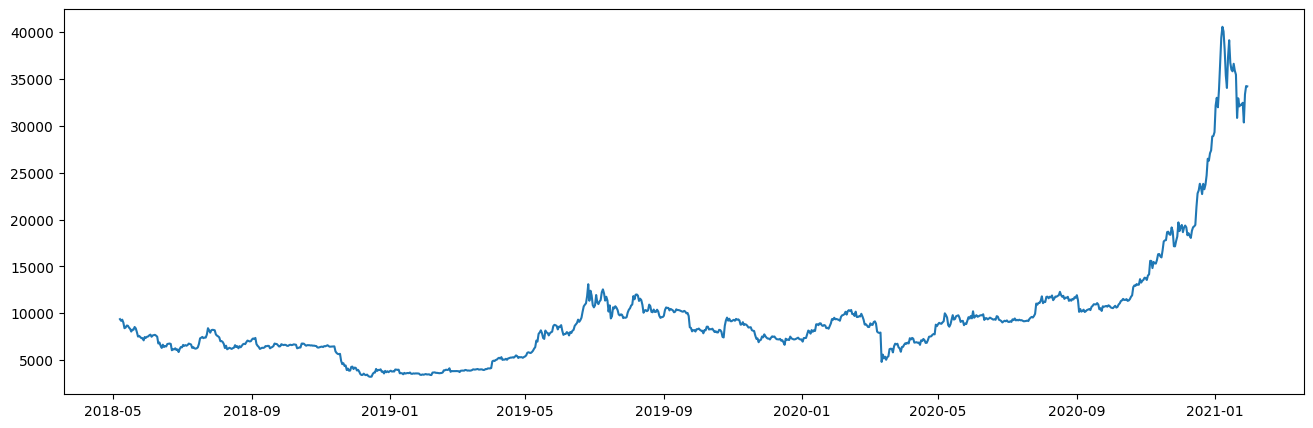

In [4]:
plt.figure(figsize=(16, 5))
plt.plot(dt['close_USD'])
plt.show()

In [5]:
# Split the data
#df.iloc[row_start:row_end, column_start:column_end]
train = dt.iloc[:-200] 
test = dt.iloc[-200:]
train

,open_SAR,open_USD,high_SAR,high_USD,low_SAR,low_USD,close_SAR,close_USD,volume
Time,,,,,,,,,
2021-01-30,128437.248512,34246.28,131012.723200,34933.00,123106.880000,32825.00,128333.212416,34218.54,43072
2021-01-29,125144.022272,33368.18,144510.037760,38531.90,119695.516160,31915.40,128459.450880,34252.20,231827
2021-01-28,113870.357376,30362.19,126703.438592,33783.98,111919.811840,29842.10,125131.570944,33364.86,92621
2021-01-27,121753.023104,32464.01,122102.860416,32557.29,109668.146688,29241.72,113885.208960,30366.15,95911
2021-01-26,120966.114176,32254.19,123470.218752,32921.88,115652.472448,30837.37,121767.124608,32467.77,84972
...,...,...,...,...,...,...,...,...,...
2018-11-27,14493.233280,3864.45,14776.576000,3940.00,13835.675648,3689.12,14533.587584,3875.21,67480
2018-11-26,15334.222976,4088.69,15774.182400,4206.00,13880.230400,3701.00,14484.794880,3862.20,94503
2018-11-25,14752.873472,3933.68,15875.443200,4233.00,13698.936064,3652.66,15323.309312,4085.78,101693


In [6]:
test

,open_SAR,open_USD,high_SAR,high_USD,low_SAR,low_USD,close_SAR,close_USD,volume
Time,,,,,,,,,
2018-11-22,17480.914432,4661.08,17708.526208,4721.77,16257.984000,4335.00,16389.248000,4370.00,34531
2018-11-21,17101.486464,4559.91,17953.914880,4787.20,16553.703040,4413.85,17480.876928,4661.07,61071
2018-11-20,18427.215360,4913.40,18932.919296,5048.24,16224.230400,4326.00,17097.548544,4558.86,117380
2018-11-19,21234.539776,5661.94,21242.265600,5664.00,18208.192000,4855.00,18414.576512,4910.03,70580
2018-11-18,21116.589696,5630.49,21520.432768,5738.17,21065.996800,5617.00,21234.764800,5662.00,23844
...,...,...,...,...,...,...,...,...,...
2018-05-11,33761.888384,9002.21,33816.606720,9016.80,31282.086400,8341.00,31503.360000,8400.00,48227
2018-05-10,34916.224000,9310.00,35235.458048,9395.12,33641.088000,8970.00,33761.850880,9002.20,25055
2018-05-09,34421.171200,9178.00,35216.256000,9390.00,33622.336000,8965.00,34916.224000,9310.00,25673


In [7]:
# ts = ARIMA(train.close_USD, order=(2, 1, 0)).fit()

In [10]:
df = dt1.rename(columns = {'Unnamed: 0' : 'ds', 'close_USD': 'y'})
df.head()

,ds,open_SAR,open_USD,high_SAR,high_USD,low_SAR,low_USD,close_SAR,y,volume
0,2021-01-30,128437.248512,34246.28,131012.723200,34933.00,123106.880000,32825.00,128333.212416,34218.54,43072
1,2021-01-29,125144.022272,33368.18,144510.037760,38531.90,119695.516160,31915.40,128459.450880,34252.20,231827
2,2021-01-28,113870.357376,30362.19,126703.438592,33783.98,111919.811840,29842.10,125131.570944,33364.86,92621
3,2021-01-27,121753.023104,32464.01,122102.860416,32557.29,109668.146688,29241.72,113885.208960,30366.15,95911
4,2021-01-26,120966.114176,32254.19,123470.218752,32921.88,115652.472448,30837.37,121767.124608,32467.77,84972


In [12]:
model = Prophet()
model.fit(df)

future = model.make_future_dataframe(periods = 365)

predictions = model.predict(future)

predictions.head()

13:10:59 - cmdstanpy - INFO - Chain [1] start processing
13:11:00 - cmdstanpy - INFO - Chain [1] done processing


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2018-05-07,2849.156759,6012.264536,8631.606033,2849.156759,2849.156759,4415.577604,4415.577604,4415.577604,9.317369,9.317369,9.317369,4406.260235,4406.260235,4406.260235,0.0,0.0,0.0,7264.734363
1,2018-05-08,2868.739691,5984.496277,8694.035344,2868.739691,2868.739691,4462.544360,4462.544360,4462.544360,-18.194121,-18.194121,-18.194121,4480.738480,4480.738480,4480.738480,0.0,0.0,0.0,7331.284051
2,2018-05-09,2888.322624,6080.409264,8745.296854,2888.322624,2888.322624,4573.739376,4573.739376,4573.739376,24.474409,24.474409,24.474409,4549.264967,4549.264967,4549.264967,0.0,0.0,0.0,7462.061999
3,2018-05-10,2907.905556,6240.822061,8832.997082,2907.905556,2907.905556,4599.798383,4599.798383,4599.798383,-11.079026,-11.079026,-11.079026,4610.877409,4610.877409,4610.877409,0.0,0.0,0.0,7507.703939
4,2018-05-11,2927.488488,6307.656902,8876.243878,2927.488488,2927.488488,4670.099473,4670.099473,4670.099473,5.371659,5.371659,5.371659,4664.727814,4664.727814,4664.727814,0.0,0.0,0.0,7597.587962


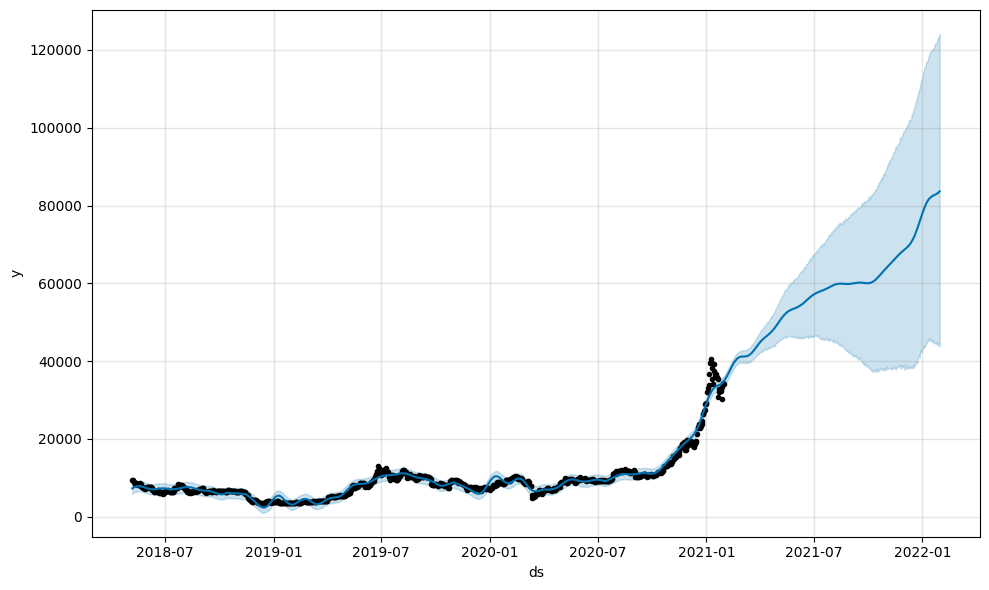

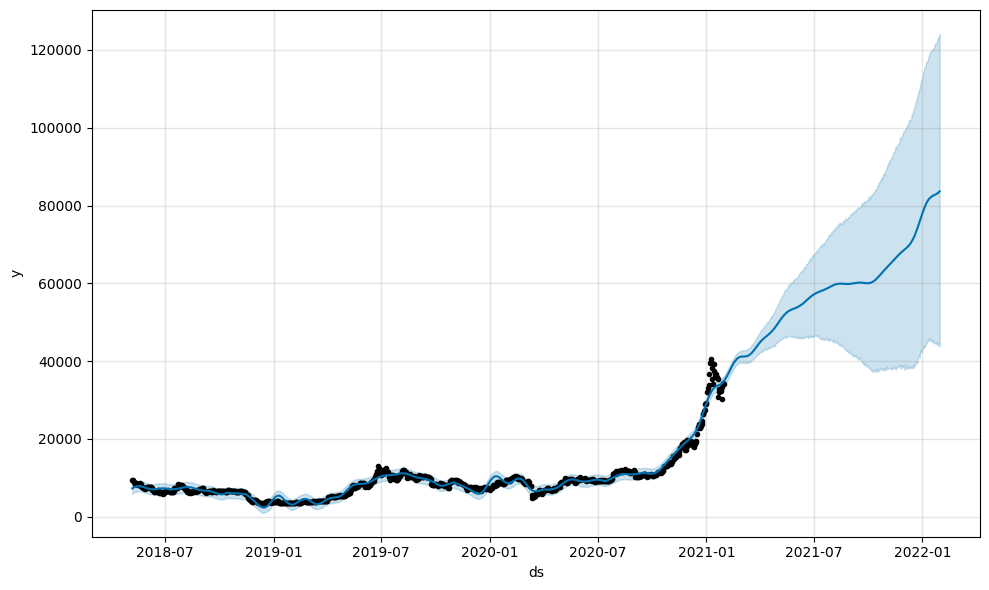

In [13]:
model.plot(predictions)

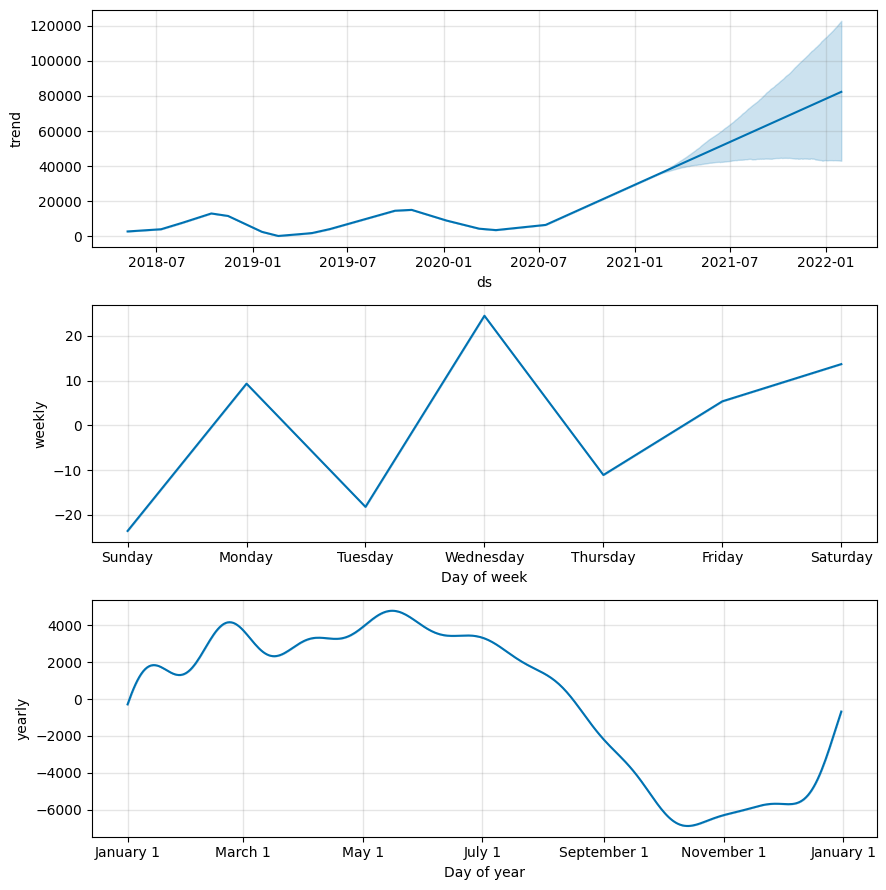

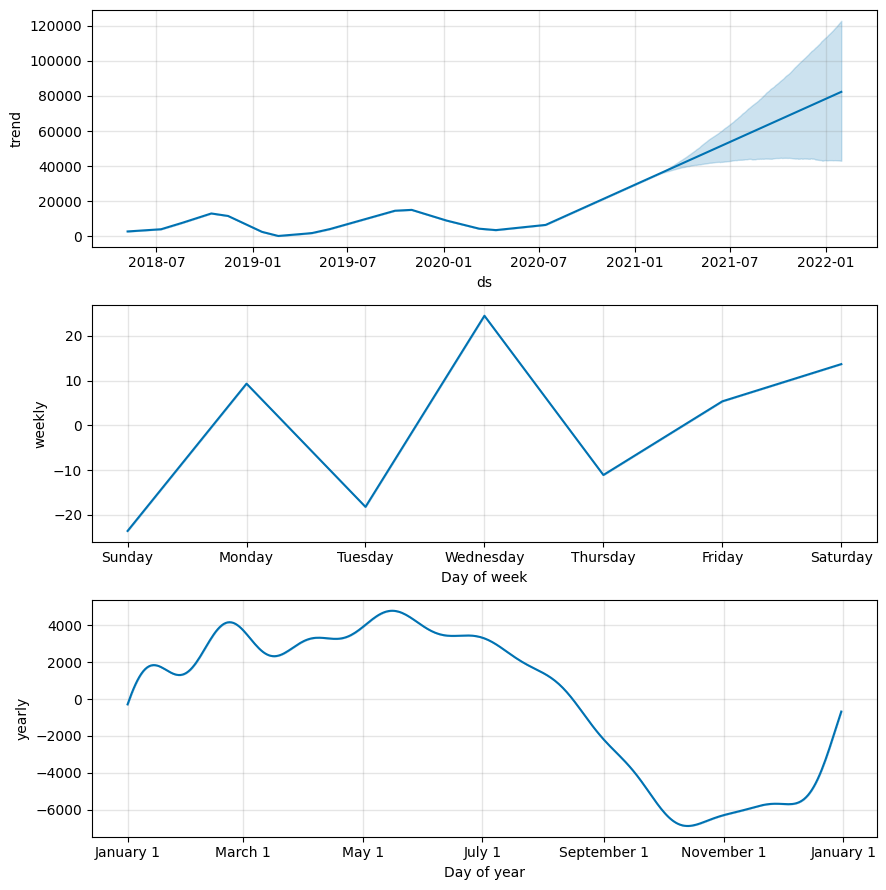

In [14]:
model.plot_components(predictions)

In [17]:
df_cv = cross_validation(model, initial='365 days', period='180 days', horizon = '365 days')
res = performance_metrics(df_cv)
res

Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.
  0%|                                                                                            | 0/2 [00:00<?, ?it/s]16:20:06 - cmdstanpy - INFO - Chain [1] start processing
16:20:06 - cmdstanpy - INFO - Chain [1] done processing
 50%|██████████████████████████████████████████                                          | 1/2 [00:00<00:00,  1.55it/s]16:20:07 - cmdstanpy - INFO - Chain [1] start processing
16:20:07 - cmdstanpy - INFO - Chain [1] done processing
100%|████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:01<00:00,  1.47it/s]


,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,37 days,8.411555e+05,917.145281,726.695798,0.072474,0.068730,0.075717,0.465753
1,38 days,8.375856e+05,915.197031,720.148913,0.072443,0.066148,0.075350,0.479452
2,39 days,8.313303e+05,911.773187,711.655601,0.072259,0.065734,0.074826,0.493151
3,40 days,8.136033e+05,901.999627,698.089587,0.071641,0.061861,0.073848,0.506849
4,41 days,1.032426e+06,1016.083771,724.091012,0.081051,0.060708,0.079087,0.520548
...,...,...,...,...,...,...,...,...
324,361 days,1.427838e+08,11949.216195,10173.702971,0.493300,0.517395,0.512209,0.547945
325,362 days,1.442284e+08,12009.512823,10233.028095,0.491795,0.517395,0.512524,0.534247
326,363 days,1.467853e+08,12115.499835,10322.575169,0.489973,0.517395,0.513211,0.520548
327,364 days,1.497584e+08,12237.582659,10430.873764,0.488961,0.515207,0.514785,0.506849


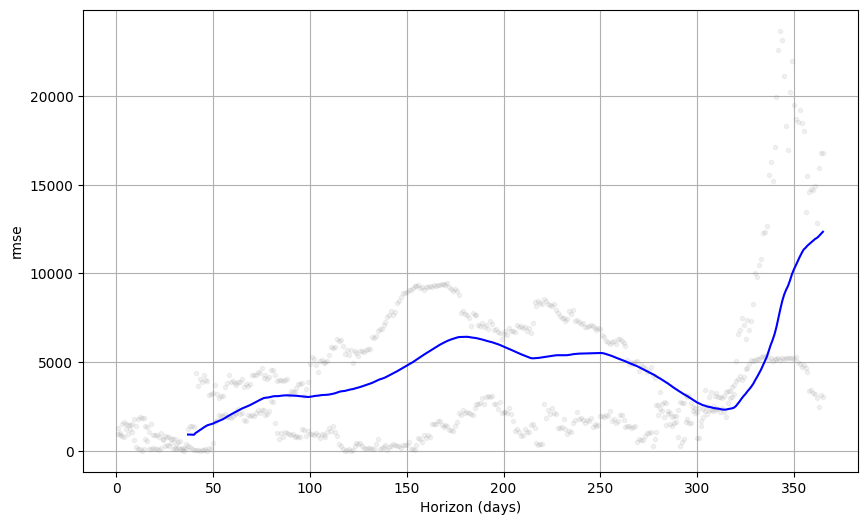

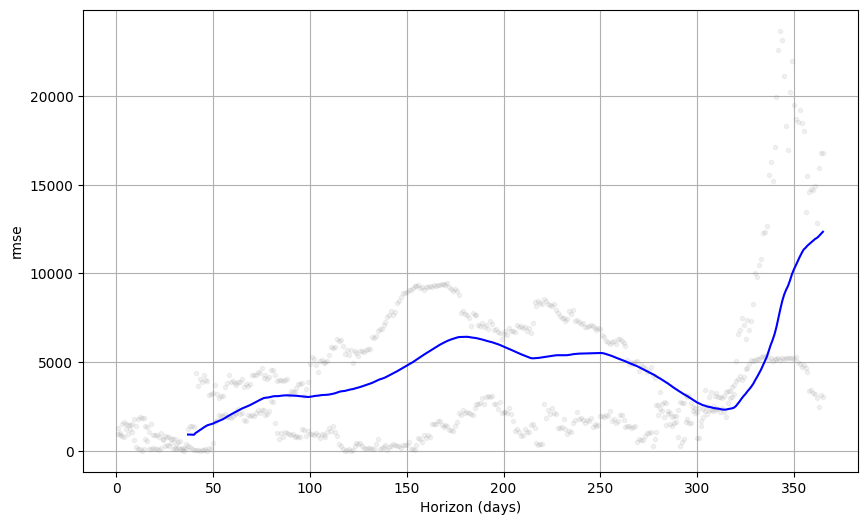

In [20]:
plot_cross_validation_metric(df_cv, metric= 'rmse')